### ESA CCI Toolbox
https://climate.esa.int/en/data/toolbox/

Very useful tool if you ever need satellite data across spheres, all the CCI branches are represented (Ocean, land, atmosphere)

**Installation**

Method 1 - Install Conda and then run the following

`$ conda create --name ect --channel conda-forge esa-climate-toolbox`

Install the jupyterlab package

`$ conda install -c conda-forge jupyterlab jupyterlab-geojson`

`$ conda activate ect`

Method 2 - Or, if you already have an existing Conda environment then just run the following with the environment activated

`$ conda install --channel conda-forge esa-climate-toolbox`

Method 3 - Install directly from the GitHub repository as follows

`$ git clone https://github.com/esa-cci/esa-climate-toolbox.git

$ cd esa-climate-toolbox

$ conda env create

$ conda activate ect

$ pip install -e .`


In [47]:
%matplotlib inline

In [60]:
from xcube.core.store import new_data_store
import IPython.display
import matplotlib.pyplot as plt
import shapely
import rioxarray
import os
import xarray as xr

In [49]:
# Example : list all LST datasets

from esa_climate_toolbox.core import list_ecv_datasets

list_ecv_datasets("LST")

[('esacci.LST.3-hours.L3S.LST.multi-sensor.multi-platform.IRMGP.1-00.r1',
  'esa-cci'),
 ('esacci.LST.day.L3C.LST.AATSR.Envisat.ATSR_3.3-00.DAY', 'esa-cci'),
 ('esacci.LST.day.L3C.LST.AATSR.Envisat.ATSR_3.3-00.NIGHT', 'esa-cci'),
 ('esacci.LST.day.L3C.LST.ATSR-2.ERS-2.ATSR_2.3-00.DAY', 'esa-cci'),
 ('esacci.LST.day.L3C.LST.ATSR-2.ERS-2.ATSR_2.3-00.NIGHT', 'esa-cci'),
 ('esacci.LST.day.L3C.LST.MODIS.Aqua.MODISA.3-00.DAY', 'esa-cci'),
 ('esacci.LST.day.L3C.LST.MODIS.Aqua.MODISA.3-00.NIGHT', 'esa-cci'),
 ('esacci.LST.day.L3C.LST.MODIS.Terra.MODIST.3-00.DAY', 'esa-cci'),
 ('esacci.LST.day.L3C.LST.MODIS.Terra.MODIST.3-00.NIGHT', 'esa-cci'),
 ('esacci.LST.day.L3C.LST.SLSTR.Sentinel-3A.SLSTRA.3-00.DAY', 'esa-cci'),
 ('esacci.LST.day.L3C.LST.SLSTR.Sentinel-3A.SLSTRA.3-00.NIGHT', 'esa-cci'),
 ('esacci.LST.day.L3C.LST.SLSTR.Sentinel-3B.SLSTRB.3-00.DAY', 'esa-cci'),
 ('esacci.LST.day.L3C.LST.SLSTR.Sentinel-3B.SLSTRB.3-00.NIGHT', 'esa-cci'),
 ('esacci.LST.day.L3C.LST.multi-sensor.multi-platform.SS

In [51]:
cci_store = new_data_store('esa-cci')

In [52]:
cci_store.describe_data('esacci.AEROSOL.mon.L3.AAI.multi-sensor.multi-platform.MSAAI.1-7.r1')

In [56]:
# Example with the zarr store
zarr_store = new_data_store('esa-cci-zarr')

In [57]:
datasets = zarr_store.list_data_ids()
datasets

['ESACCI-BIOMASS-L4-AGB-MERGED-100m-2010-2018-fv2.0.zarr',
 'ESACCI-BIOMASS-L4-AGB-MERGED-100m-2010-2020-fv4.0.zarr',
 'ESACCI-GHG-L2-CH4-SCIAMACHY-WFMD-2002-2011-fv1.zarr',
 'ESACCI-GHG-L2-CO2-OCO-2-FOCAL-2014-2021-v10.zarr',
 'ESACCI-GHG-L2-CO2-SCIAMACHY-WFMD-2002-2012-fv1.zarr',
 'ESACCI-ICESHEETS_Antarctica_GMB-2002-2016-v1.1.zarr',
 'ESACCI-ICESHEETS_Greenland_GMB-2003-2016-v1.1.zarr',
 'ESACCI-L3C_CLOUD-CLD_PRODUCTS-AVHRR_NOAA-1982-2016-fv3.0.zarr',
 'ESACCI-L3C_SNOW-SWE-1979-2018-fv1.0.zarr',
 'ESACCI-L3C_SNOW-SWE-1979-2020-fv2.0.zarr',
 'ESACCI-L4_GHRSST-SST-GMPE-GLOB_CDR2.0-1981-2016-v02.0-fv01.0.zarr',
 'ESACCI-LC-L4-LCCS-Map-300m-P1Y-1992-2015-v2.0.7b.zarr',
 'ESACCI-LST-L3C-LST-MODISA-0.01deg_1DAILY_DAY-2002-2018-fv3.00.zarr',
 'ESACCI-LST-L3C-LST-MODISA-0.01deg_1DAILY_NIGHT-2002-2018-fv3.00.zarr',
 'ESACCI-LST-L3S-LST-IRCDR_-0.01deg_1DAILY_DAY-1995-2020-fv3.00.zarr',
 'ESACCI-LST-L3S-LST-IRCDR_-0.01deg_1DAILY_NIGHT-1995-2020-fv3.00.zarr',
 'ESACCI-LST-L3S-LST-IRCDR_-0.01de

In [58]:
# get MODIS LST data
modis_lst = zarr_store.open_data('ESACCI-LST-L3C-LST-MODISA-0.01deg_1DAILY_DAY-2002-2018-fv3.00.zarr')

/local/sdupuis/software/conda/envs/ect/lib/python3.13/site-packages/xcube/core/store/fs/impl/dataset.py:160: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  dataset = xr.open_zarr(zarr_store, consolidated=consolidated, **open_params)


In [7]:
modis_lst

<xarray.Dataset> Size: 342TB
Dimensions:          (channel: 2, time: 6004, lat: 18000, lon: 36000)
Coordinates:
  * channel          (channel) float64 16B 11.0 12.0
  * lat              (lat) float32 72kB -90.0 -89.99 -89.98 ... 89.98 89.99
  * lon              (lon) float32 144kB -180.0 -180.0 -180.0 ... 180.0 180.0
  * time             (time) datetime64[ns] 48kB 2002-07-04 ... 2018-12-31
Data variables:
    dtime            (time, lat, lon) timedelta64[ns] 31TB dask.array<chunksize=(1, 2000, 2000), meta=np.ndarray>
    lcc              (time, lat, lon) float32 16TB dask.array<chunksize=(1, 2000, 2000), meta=np.ndarray>
    lst              (time, lat, lon) float64 31TB dask.array<chunksize=(1, 2000, 2000), meta=np.ndarray>
    lst_unc_loc_atm  (time, lat, lon) float64 31TB dask.array<chunksize=(1, 2000, 2000), meta=np.ndarray>
    lst_unc_loc_sfc  (time, lat, lon) float64 31TB dask.array<chunksize=(1, 2000, 2000), meta=np.ndarray>
    lst_unc_ran      (time, lat, lon) float64 31TB dask.array<chunksize=(1, 2000, 2000), meta=np.ndarray>
    lst_uncertainty  (time, lat, lon) float64 31TB dask.array<chunksize=(1, 2000, 2000), meta=np.ndarray>
    qual_flag        (time, lat, lon) float32 16TB dask.array<chunksize=(1, 2000, 2000), meta=np.ndarray>
    sataz            (time, lat, lon) float64 31TB dask.array<chunksize=(1, 2000, 2000), meta=np.ndarray>
    satze            (time, lat, lon) float64 31TB dask.array<chunksize=(1, 2000, 2000), meta=np.ndarray>
    solaz            (time, lat, lon) float64 31TB dask.array<chunksize=(1, 2000, 2000), meta=np.ndarray>
    solze            (time, lat, lon) float64 31TB dask.array<chunksize=(1, 2000, 2000), meta=np.ndarray>
Attributes: (12/42)
    Conventions:                CF-1.8
    catalogue_url:              https://catalogue.ceda.ac.uk/uuid/6babb8d9a8d...
    cdm_data_type:              grid
    comment:                    These data were produced as part of the ESA L...
    creator_email:              djg20@le.ac.uk
    creator_name:               University of Leicester Surface Temperature G...
    ...                         ...
    summary:                    This file contains level L3C global land surf...
    time_coverage_duration:     PT04M59S
    time_coverage_end:          19700101T000001Z
    time_coverage_resolution:   P1D
    time_coverage_start:        19700101T000001Z
    title:                      ESA LST CCI land surface temperature data at ...

In [10]:
# select one point
modis_sweden = modis_lst['lst'].sel(lat = 64.2443, lon = 19.7663, method='nearest')
modis_sweden

<xarray.DataArray 'lst' (time: 6004)> Size: 48kB
dask.array<getitem, shape=(6004,), dtype=float64, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
    lat      float32 4B 64.24
    lon      float32 4B 19.76
  * time     (time) datetime64[ns] 48kB 2002-07-04 2002-07-05 ... 2018-12-31
Attributes:
    long_name:  land surface temperature
    units:      kelvin
    valid_max:  7685
    valid_min:  -8315

In [11]:
# select relevant time period
modis_sweden = modis_sweden.sel(time=slice('2016', '2018'))

In [12]:
modis_sweden

<xarray.DataArray 'lst' (time: 1093)> Size: 9kB
dask.array<getitem, shape=(1093,), dtype=float64, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
    lat      float32 4B 64.24
    lon      float32 4B 19.76
  * time     (time) datetime64[ns] 9kB 2016-01-01 2016-01-02 ... 2018-12-31
Attributes:
    long_name:  land surface temperature
    units:      kelvin
    valid_max:  7685
    valid_min:  -8315

In [13]:
# load the data from the cloud (takes around 20s-30s)
modis_sweden = modis_sweden.load()

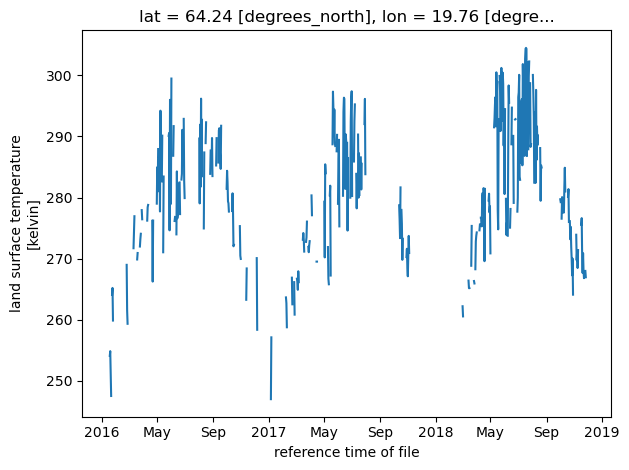

In [59]:
modis_sweden.plot();
#plt.show()

In [19]:
modis_sweden.max()

<xarray.DataArray 'lst' ()> Size: 8B
array(304.4999932)
Coordinates:
    lat      float32 4B 64.24
    lon      float32 4B 19.76

In [18]:
modis_sweden.min()

<xarray.DataArray 'lst' ()> Size: 8B
array(246.98999448)
Coordinates:
    lat      float32 4B 64.24
    lon      float32 4B 19.76

### Comparison with the AVHRR data

In [62]:
# load  AVHRR data
# import lac data
full_ds = xr.open_mfdataset('/scratch/sdupuis/GP_3/Svartaberg_10_05_2023/2018/metop1/2018/*.nc', concat_dim='time', combine='nested', engine='netcdf4')


In [63]:
# set emissivity
coniferous_f_ch4 = 0.989
coniferious_f_ch5 = 0.991

In [64]:
# select point of interest
time_series =  full_ds.sel(y = 64.2443, x = 19.7663, method='nearest')

In [65]:
# Remove clouds first, value of 110 means cloud cover
no_clouds = time_series.where(time_series['image4']>110)

In [66]:
# compute mean and emissivity difference and compute LST
diff_em = coniferous_f_ch4 - coniferious_f_ch5
e_mean = (coniferous_f_ch4 + coniferious_f_ch5)/2
LST = no_clouds['image4']+1.8*(no_clouds['image4']-no_clouds['image5'])+ 48*(1-e_mean) -75*diff_em

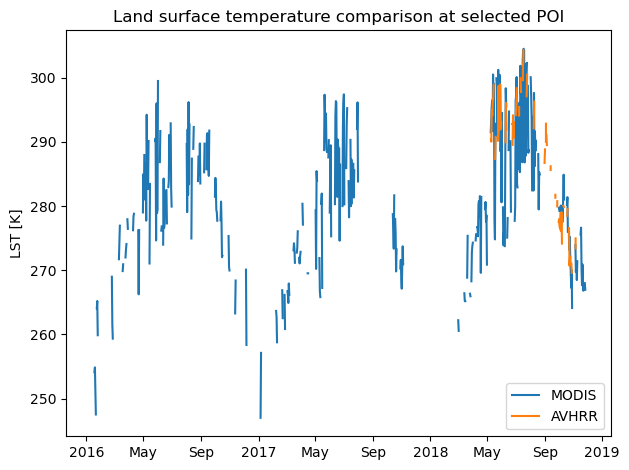

In [74]:
# plot the obtained LST
modis_sweden.plot(label='MODIS');
LST.plot(label='AVHRR');

plt.title('Land surface temperature comparison at selected POI');
plt.ylabel('LST [K]')
plt.xlabel('');
plt.legend();

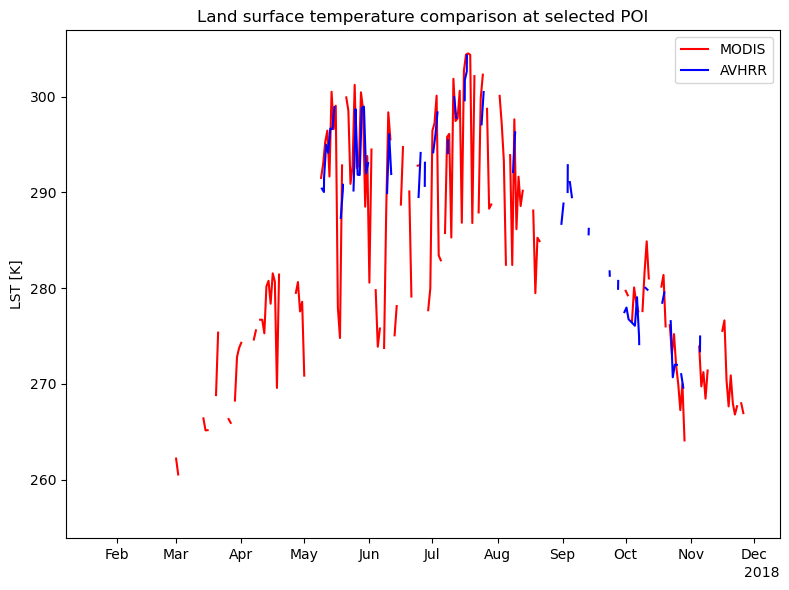

In [73]:
# Make the plot nicer
fig, ax= plt.subplots(1, 1, figsize=(8, 6))

modis_sweden.sel(time=slice('2018-01', '2018-12')).plot(label='MODIS', ax=ax, color='red');
LST.plot(label='AVHRR', ax=ax, color='blue');

plt.title('Land surface temperature comparison at selected POI');
plt.ylabel('LST [K]')
plt.xlabel('');
plt.legend();
